# Sales and Production planning analysis for GOLHA CO in year 1402 (2023-2024)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [2]:
Analysis_df=pd.read_excel('3_years_sales_production.xlsx')

In [3]:
Analysis_df.head()

,productcode,ProductName,Production,Production_Predict,Sale,Year_month,year,month
0,22010001,ادویه پلوئی - (سلفون) - بسته نیم کیلویی,18.0,12.0,10.0,1400/11,1400,11
1,22010001,ادویه پلوئی - (سلفون) - بسته نیم کیلویی,4.0,4.8,4.0,1400/12,1400,12
2,22010001,ادویه پلوئی - (سلفون) - بسته نیم کیلویی,3.0,0.0,0.0,1401/01,1401,1
3,22010001,ادویه پلوئی - (سلفون) - بسته نیم کیلویی,21.0,14.4,12.0,1401/05,1401,5
4,22010001,ادویه پلوئی - (سلفون) - بسته نیم کیلویی,1.0,1.2,1.0,1401/06,1401,6


In [4]:
Analysis_df.shape

(19379, 8)

In [5]:
Analysis_df.describe()

,productcode,Production,Production_Predict,Sale,year,month
count,1.937900e+04,1.937900e+04,1.937900e+04,1.937900e+04,19379.000000,19379.000000
mean,2.244319e+07,2.804085e+04,3.459404e+04,2.881269e+04,1401.103256,6.709221
std,4.905057e+05,4.349379e+05,4.628055e+05,3.856724e+05,0.798982,3.470237
min,2.201000e+07,-4.900196e+06,0.000000e+00,-1.973060e+04,1400.000000,1.000000
25%,2.201020e+07,0.000000e+00,8.040000e+01,6.600000e+01,1400.000000,4.000000
50%,2.231003e+07,3.300000e+02,9.972000e+02,8.260000e+02,1401.000000,7.000000
75%,2.281001e+07,3.768000e+03,4.437600e+03,3.694000e+03,1402.000000,10.000000
max,2.371000e+07,1.646000e+07,1.659360e+07,1.382800e+07,1402.000000,12.000000


# Important Result:
### As we can the std value in Production and sale are:
- 4.349379
- 3.856724
### This standard derivation shows that :
- based on Mean values for these two parameters 
(2.804085e,2.881269e) 
we see so much derivation on them and 
## it can affects our prediction

In [6]:
Analysis_df.dtypes

productcode             int64
ProductName            object
Production            float64
Production_Predict    float64
Sale                  float64
Year_month             object
year                    int64
month                   int64
dtype: object

### Data cleaning

In [7]:
cdf=Analysis_df.copy()

In [8]:
cdf=cdf.fillna(0)
cdf['Sale'] = cdf['Sale'].astype(int)
cdf['productcode'] = cdf['productcode'].astype(int)

In [9]:
cdf.dtypes

productcode             int32
ProductName            object
Production            float64
Production_Predict    float64
Sale                    int32
Year_month             object
year                    int64
month                   int64
dtype: object

In [11]:
cdf.head(5)

,productcode,ProductName,Production,Production_Predict,Sale,Year_month,year,month
0,22010001,ادویه پلوئی - (سلفون) - بسته نیم کیلویی,18.0,12.0,10,1400/11,1400,11
1,22010001,ادویه پلوئی - (سلفون) - بسته نیم کیلویی,4.0,4.8,4,1400/12,1400,12
2,22010001,ادویه پلوئی - (سلفون) - بسته نیم کیلویی,3.0,0.0,0,1401/01,1401,1
3,22010001,ادویه پلوئی - (سلفون) - بسته نیم کیلویی,21.0,14.4,12,1401/05,1401,5
4,22010001,ادویه پلوئی - (سلفون) - بسته نیم کیلویی,1.0,1.2,1,1401/06,1401,6


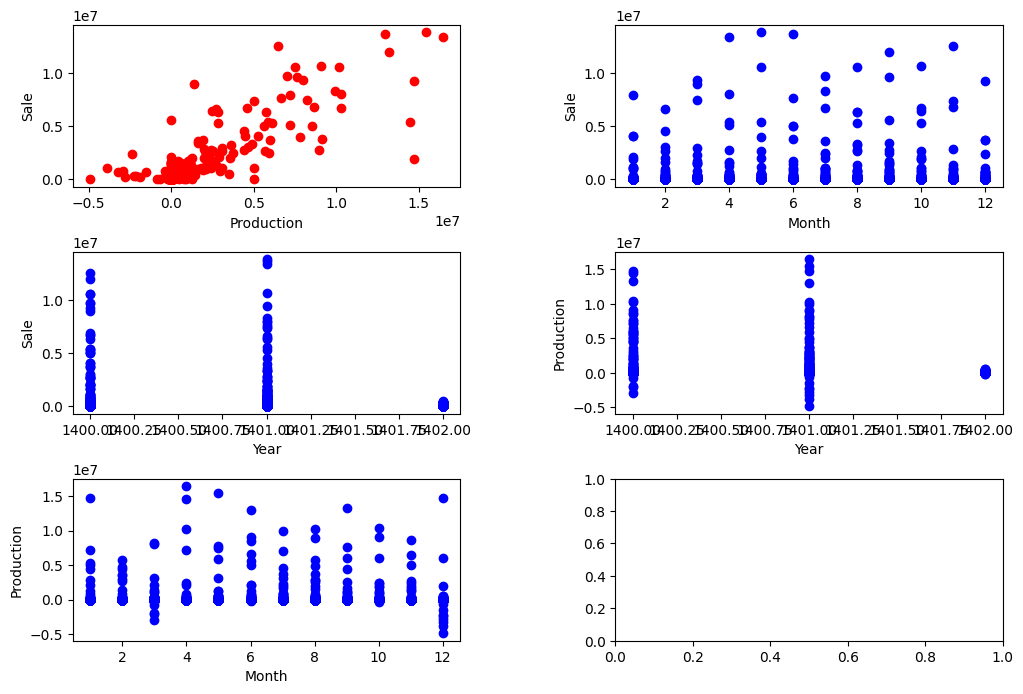

In [12]:
# Create a figure with 2 rows and 2 columns of subplots  
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))  

# First subplot: Scatter plot of Production vs. Sale  
axes[0, 0].scatter(cdf.Production, cdf.Sale, color='r')  
axes[0, 0].set_xlabel('Production')  
axes[0, 0].set_ylabel('Sale')  

# Second subplot: Scatter plot of Month vs. Sale  
axes[0, 1].scatter(cdf.month, cdf.Sale, color='b')  
axes[0, 1].set_xlabel('Month')  
axes[0, 1].set_ylabel('Sale')  

# Third subplot: Scatter plot of year vs. Sale  
axes[1, 0].scatter(cdf.year, cdf.Sale, color='b')  
axes[1, 0].set_xlabel('Year')  
axes[1, 0].set_ylabel('Sale')  

# Forth subplot: Scatter plot of year vs. Production  
axes[1, 1].scatter(cdf.year, cdf.Production, color='b')  
axes[1, 1].set_xlabel('Year')  
axes[1, 1].set_ylabel('Production')  

# Five subplot: Scatter plot of Month vs. Production  
axes[2, 0].scatter(cdf.month, cdf.Production, color='b')  
axes[2, 0].set_xlabel('Month')  
axes[2, 0].set_ylabel('Production')  


# Adjust the spacing between subplots  
plt.subplots_adjust(wspace=0.4, hspace=0.4)  

# Display the figure  
plt.show()

In [13]:
msk=np.random.rand(len(cdf))<0.8
train_df=cdf[msk]
test_df=cdf[~msk]

In [14]:
train_x=np.asanyarray(train_df.Production).reshape(-1, 1)  
train_y=np.asanyarray(train_df.Sale).reshape(-1, 1)  
#train_y = np.transpose(train_y) 
#############################
test_x=np.asanyarray(test_df.Production).reshape(-1, 1)  
test_y=np.asanyarray(test_df.Sale).reshape(-1, 1)  
#test_y = np.transpose(test_y) 

In [26]:
poly=PolynomialFeatures(degree=2)
train_x_poly=poly.fit_transform(train_x)
print(train_x_poly)

[[ 1.00e+00  1.80e+01  3.24e+02]
 [ 1.00e+00  4.00e+00  1.60e+01]
 [ 1.00e+00  3.00e+00  9.00e+00]
 ...
 [ 1.00e+00 -1.60e+02  2.56e+04]
 [ 1.00e+00 -3.00e+00  9.00e+00]
 [ 1.00e+00 -1.40e+01  1.96e+02]]


In [27]:
print(train_x_poly.shape)  
print(train_y.shape)  

(15436, 3)
(15436, 1)


In [28]:
clf=linear_model.LinearRegression()
train_y_=clf.fit(train_x_poly,train_y)

In [24]:
print(f'The coefficient is :{train_y_.coef_}')
print(f'The intercept is: {train_y_.intercept_}')

The coefficient is :[[ 0.00000000e+00  5.78756432e-01  8.55722722e-08 -5.88418203e-15]]
The intercept is: [6860.62109765]


C:\Users\admin\AppData\Local\Temp\ipykernel_7992\1465338981.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(train_df['Production'], train_df['Sale'], cmap='viridis', alpha=0.6)


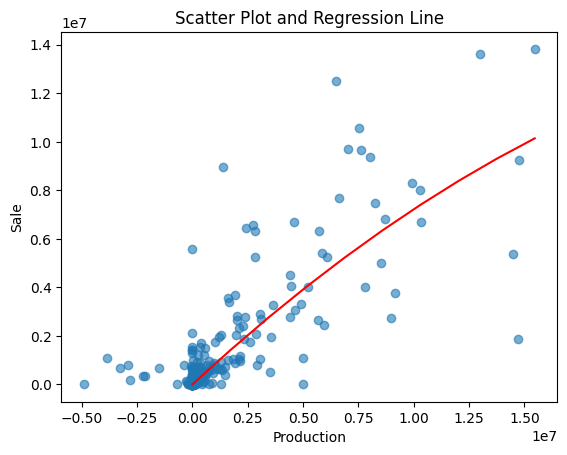

In [34]:
# Scatter plot  
scatter = plt.scatter(train_df['Production'], train_df['Sale'], cmap='viridis', alpha=0.6)  

# Line plot  
xx = np.linspace(0, train_df['Production'].max(), 10)  
yy = clf.coef_[0][0] + clf.coef_[0][1] * xx + clf.coef_[0][2] * xx**2  
plt.plot(xx, yy, '-r')  

# Add labels and title  
plt.xlabel('Production')  
plt.ylabel('Sale')  
plt.title('Scatter Plot and Regression Line')  

# Display the plot  
plt.show()

In [35]:
from sklearn.metrics import r2_score
test_x_poly = poly.fit_transform(test_x)  
test_y_ = clf.predict(test_x_poly)  
print(f'Mean Absolute Error: {np.mean(np.abs(test_y_ - test_y))}')  
print(f'MSE: {np.mean((test_y_ - test_y) ** 2)}')  
print(f'The r2_score is: {r2_score(test_y, test_y_)}')

Mean Absolute Error: 17715.149640156367
MSE: 24776663656.222424
The r2_score is: 0.8725236014367396


# Final Result to discover 
# Relation between Sale VS Productiom:
#### The analysis SHows:
### The Equation is : production = a + b * sale + c * sale**2
    - a=clf.coef_[0][0]=0
    - b=clf.coef_[0][1]=5.78756432e-01=0.578756432
    - c=clf.coef_[0][2]=8.55722722e-08=0.0000000855722722 
    - def predict_production(sale):  
    return a + b * sale + c * sale**2